In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('carefirst_med_n18.csv')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,memb_life_id,group_number,group_section_number,employer_group_id,package_code_nasco_class_code_facets,subgroup,financial_market_segment,risk_type,legal_entity,jurisdiction,...,coinsurance_amount,deductible_amount,paid_amount,allowed_amount,its_access_fees,its_supplemental_fees,surcharge_amount,medicare_paid_amount,non_covered_amount,cob_amount
0,260993,99M1,NaN,NaN,CR07,99M1MCRN,IMD Medigap,RISK,CFMI,Maryland,...,0.0,0.0,42.05,42.05,0.0,0.0,0.0,164.84,0.0,164.84
1,143962,99M1,NaN,NaN,JU04,99M1MJUN,IMD Non-Medigap,RISK,CFMI,Maryland,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
2,143962,99M1,NaN,NaN,JU04,99M1MJUN,IMD Non-Medigap,RISK,CFMI,Maryland,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
3,143962,99M1,NaN,NaN,JU04,99M1MJUN,IMD Non-Medigap,RISK,CFMI,Maryland,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
4,143962,99M1,NaN,NaN,JU04,99M1MJUN,IMD Non-Medigap,RISK,CFMI,Maryland,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00


In [29]:
df.columns

Index(['memb_life_id', 'group_number', 'group_section_number',
       'employer_group_id', 'package_code_nasco_class_code_facets', 'subgroup',
       'financial_market_segment', 'risk_type', 'legal_entity', 'jurisdiction',
       'gender_code', 'relationship_code', 'relationship_description',
       'subscriber_zip_code', 'level_of_coverage_description',
       'claim_type_code', 'claim_number', 'line_number', 'claim_disposition',
       'payee_code', 'network_indicator', 'bill_type',
       'internal_provider_number', 'provider_zip_code', 'specialty_code',
       'specialty_code_description', 'par_nonpar_code', 'product_description',
       'place_of_service_code', 'type_of_service_code', 'cpt',
       'cpt_modifier_1', 'cpt_modifier_2', 'revenue_code',
       'primary_diagnosis_code_icd9', 'secondary_diagnosis_code_icd9',
       'tertiary_diagnosis_code_icd9', 'icd9_surgical_procedure_code_1',
       'icd9_surgical_procedure_code_2', 'icd9_surgical_procedure_code_3',
       'icd9_sur

In [261]:
df.columns.get_loc('receipt_date')

62

In [7]:
len(df['memb_life_id'].unique())

2543

In [8]:
len(df)

406827

In [15]:
df[df['primary_diagnosis_code_icd10']=='N186']['tertiary_diagnosis_code_icd10']

1         D509
2         D509
3         D509
4         D509
5         D509
          ... 
406822    D509
406823    D509
406824    D509
406825    D509
406826    Z992
Name: tertiary_diagnosis_code_icd10, Length: 387856, dtype: object

In [16]:
df['memb_life_id'].unique()

array([260993, 143962, 163477, ..., 780215,  55632, 166101])

In [47]:
df[df['memb_life_id'] == 260993][['primary_diagnosis_code_icd10','line_service_from_date']]

,primary_diagnosis_code_icd10,line_service_from_date
0,N183,2017-03-24
21729,N189,2017-07-20
110691,N189,2017-07-20
110692,N189,2017-07-20
110693,N189,2017-07-20
110694,N183,2017-03-28
154744,N189,2017-07-20
154745,N189,2017-07-20
154746,N189,2017-07-20
154747,N189,2017-07-20


In [39]:
cols_needed = ['memb_life_id','primary_diagnosis_code_icd10','secondary_diagnosis_code_icd10','tertiary_diagnosis_code_icd10','line_service_thru_date']
df_cur = df[cols_needed]

In [40]:
df_cur.head()

,memb_life_id,primary_diagnosis_code_icd10,secondary_diagnosis_code_icd10,tertiary_diagnosis_code_icd10,line_service_thru_date
0,260993,N183,L03319,D696,2017-03-24
1,143962,N186,N2581,D509,2018-11-21
2,143962,N186,N2581,D509,2018-12-07
3,143962,N186,N2581,D509,2018-12-17
4,143962,N186,N2581,D509,2018-12-05


In [52]:
len(df_cur[df_cur['primary_diagnosis_code_icd10'] == 'N186']['memb_life_id'].unique())

404

In [137]:
df_cur['memb_life_id'].unique()

array([260993, 143962, 163477, ..., 780215,  55632, 166101])

In [69]:
for index,row in df_cur[df_cur['memb_life_id'] == 260993].iterrows():
    print(row['primary_diagnosis_code_icd10'])

N183
N189
N189
N189
N189
N183
N189
N189
N189
N189
N189
N189
N189
N183
N184
N184
N183
N183
N184
N189


In [125]:
pri = df_cur['primary_diagnosis_code_icd10'].value_counts()[:10].index

In [126]:
sec=df_cur['secondary_diagnosis_code_icd10'].value_counts()[:9].index

In [127]:
ter=df_cur['tertiary_diagnosis_code_icd10'].value_counts()[:7].index

In [158]:
p = set()
for index,row in df_cur[df_cur['memb_life_id'] == 166101].iterrows():
        p.add(row['primary_diagnosis_code_icd10'])
        p.add(row['secondary_diagnosis_code_icd10'])
        p.add(row['tertiary_diagnosis_code_icd10'])
    

In [159]:
p

{'*', 'N183'}

In [160]:
df_cur[df_cur['memb_life_id'] == 166101]

,memb_life_id,primary_diagnosis_code_icd10,secondary_diagnosis_code_icd10,tertiary_diagnosis_code_icd10,line_service_thru_date
406734,166101,N183,*,*,2018-01-24


In [128]:
pri = np.append(pri,sec)

In [129]:
pri = np.append(pri,ter)

In [130]:
pri = set(pri)

In [131]:
len(pri)

16

In [107]:
df_cur['primary_diagnosis_code_icd10'].value_counts()[:10].index

Index(['N186', 'N183', 'N184', 'N189', 'N185', 'N182', 'N181'], dtype='object')

In [135]:
pri = list(pri)
for i in range(len(pri)):
    print(pri[i])

N181
N182
I10
N185
N183
D509
N184
L299
E7143
N2581
E611
N186
D631
Z992
*
N189


In [172]:
pri

['N181',
 'N182',
 'I10',
 'N185',
 'N183',
 'D509',
 'N184',
 'L299',
 'E7143',
 'N2581',
 'E611',
 'N186',
 'D631',
 'Z992',
 'NA',
 'N189']

In [223]:

for i in df_cur['memb_life_id'].unique():
    mid = set()
    d = []
    p = set()
    drow = []
    r_row = []
    cons = []
    for index,row in df_cur[df_cur['memb_life_id'] == i].iterrows():
        p.add(row['primary_diagnosis_code_icd10'])
        p.add(row['secondary_diagnosis_code_icd10'])
        p.add(row['tertiary_diagnosis_code_icd10'])
        d.append(row['line_service_thru_date'])
        mid.add(row['memb_life_id'])
    duration = max(d) - min(d)
    mid = list(mid)
    drow.append(mid)
    drow.append(duration)
    p = list(p)
    drow.append(p)
    r_row.append(drow[0][0])
    r_row.append(drow[1])
    for pp in range(len(pri)):
        val = pri[pp] in p
        r_row.append(val)
        

In [217]:
p = list(p)
p[1] in pri

True

In [227]:
import datetime

In [228]:
r_row[1] == datetime.timedelta(days=0)

True

In [143]:
df_cur['line_service_thru_date'] = pd.to_datetime(df_cur['line_service_thru_date'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
cols_= ['primary_diagnosis_code_icd10','secondary_diagnosis_code_icd10','tertiary_diagnosis_code_icd10']

In [229]:
pri

['N181',
 'N182',
 'I10',
 'N185',
 'N183',
 'D509',
 'N184',
 'L299',
 'E7143',
 'N2581',
 'E611',
 'N186',
 'D631',
 'Z992',
 'NA',
 'N189']

In [230]:
r_row

[166101,
 Timedelta('0 days 00:00:00'),
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [231]:
df_cols = ['member_id','duration']

In [232]:
for ppp in range(len(pri)):
    df_cols.append(pri[ppp])

In [233]:
df_cols

['member_id',
 'duration',
 'N181',
 'N182',
 'I10',
 'N185',
 'N183',
 'D509',
 'N184',
 'L299',
 'E7143',
 'N2581',
 'E611',
 'N186',
 'D631',
 'Z992',
 'NA',
 'N189']

In [234]:
df_cur = df_cur.replace('*','NA')

In [239]:
df_cur[df_cur['line_service_thru_date']=='*']

,memb_life_id,primary_diagnosis_code_icd10,secondary_diagnosis_code_icd10,tertiary_diagnosis_code_icd10,line_service_thru_date


In [240]:
df_main = pd.DataFrame(columns = df_cols)

In [241]:
for i in df_cur['memb_life_id'].unique():
    mid = set()
    d = []
    p = set()
    drow = []
    r_row = []
    cons = []
    for index,row in df_cur[df_cur['memb_life_id'] == i].iterrows():
        p.add(row['primary_diagnosis_code_icd10'])
        p.add(row['secondary_diagnosis_code_icd10'])
        p.add(row['tertiary_diagnosis_code_icd10'])
        d.append(row['line_service_thru_date'])
        mid.add(row['memb_life_id'])
    duration = max(d) - min(d)
    mid = list(mid)
    drow.append(mid)
    drow.append(duration)
    p = list(p)
    drow.append(p)
    r_row.append(drow[0][0])
    r_row.append(drow[1])
    for pp in range(len(pri)):
        val = pri[pp] in p
        r_row.append(val)
    df_main.loc[i] = r_row

In [279]:
df_main_copy[df_main_copy['duration'] == zer].index

Int64Index([  356497,   739976,   645607,   267245,  1816004,   709325,
              817062,   211592, 24046190,   732335,
            ...
              589689,   835068,  1925390, 25557525,    60128, 23519561,
            24318571,   780215,    55632,   166101],
           dtype='int64', length=772)

In [257]:
zer = datetime.timedelta(days=0, hours=0,minutes=0, seconds=0)

In [274]:
df[df['memb_life_id'] == 739976].iloc[:,61:71]

,discharge_status,receipt_date,paid_date,line_service_from_date,line_service_thru_date,header_service_from_date,header_service_thru_date,admission_date,discharge_date,number_of_submitted_inpatient_days
217,NaN,2018-03-08,2018-03-13,2018-02-16,2018-02-16,2018-02-16,2018-02-16,9999-12-31,NaN,0
387216,NaN,2018-03-08,2018-03-13,2018-02-16,2018-02-16,2018-02-16,2018-02-16,9999-12-31,NaN,0
387217,NaN,2018-03-08,2018-03-13,2018-02-16,2018-02-16,2018-02-16,2018-02-16,9999-12-31,NaN,0


In [275]:
df_main_copy = df_main.copy(deep=True)

In [277]:
df_main = df_main.drop(df_main[df_main['duration'] == zer].index)

In [297]:
df_main[df_main['Z992'] == True]

,member_id,duration,N181,N182,I10,N185,N183,D509,N184,L299,E7143,N2581,E611,N186,D631,Z992,NA,N189
143962,143962,606 days,True,False,True,False,False,True,True,False,False,True,False,True,True,True,True,True
1882108,1882108,102 days,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,False
6950281,6950281,728 days,False,False,True,False,False,True,False,False,False,True,False,True,True,True,True,False
277792,277792,727 days,False,False,True,False,False,True,False,False,False,True,True,True,True,True,True,True
214197,214197,719 days,False,False,True,True,True,True,True,False,False,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270104,270104,218 days,False,False,False,False,True,False,True,False,False,False,False,True,True,True,True,True
167929,167929,515 days,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False
183256,183256,643 days,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False
713034,713034,27 days,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [290]:
df_main.shape

(1771, 18)

In [366]:
df_main.head()

,member_id,duration,N181,N182,I10,N185,N183,D509,N184,L299,E7143,N2581,E611,N186,D631,Z992,NA,N189,outcome
260993,260993,157 days,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,0
143962,143962,606 days,True,False,True,False,False,True,True,False,False,True,False,True,True,True,True,True,1
163477,163477,506 days,False,False,False,False,True,False,True,False,False,False,False,True,True,False,True,False,1
211531,211531,2 days,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1882108,1882108,102 days,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,False,1


In [302]:
df_main['member_id'].iloc[0]

260993

In [358]:
for i in range(len(df_main['member_id'].unique())):
    df_main['outcome'].iloc[i] = ((df_main[df_main['member_id'] == df_main['member_id'].iloc[i]]['N186'].iloc[0]) and (df_main[df_main['member_id'] == df_main['member_id'].iloc[i]]['N185'].iloc[0]))
    

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [336]:
((df_main[df_main['member_id'] == 143962]['N186'].iloc[0]) or (df_main[df_main['member_id'] == 143962]['N185'].iloc[0]))

True

In [327]:
df_main['member_id'].iloc[i]

464004

In [369]:
df_main.drop('outcome',axis=1,inplace=True)

In [350]:
(df_main[df_main['member_id'] == df_main['member_id'].iloc[1]]['N185'].iloc[0])

False

In [351]:
df_main['member_id'].iloc[1]

143962

In [354]:
df_main['outcome'].iloc[1]

False

In [370]:
df_main['outcome'] = ''

In [360]:
df_main['outcome'].iloc[i]

False

In [375]:
df_main['member_id'].iloc[i]

0

In [372]:
df_main['outcome'] = df_main['N185'] + df_main['N186']

In [374]:
df_main.dtypes

member_id             object
duration     timedelta64[ns]
N181                  object
N182                  object
I10                   object
N185                  object
N183                  object
D509                  object
N184                  object
L299                  object
E7143                 object
N2581                 object
E611                  object
N186                  object
D631                  object
Z992                  object
NA                    object
N189                  object
outcome               object
dtype: object

In [377]:
df_main['outcome'].value_counts()

0    1351
1     420
Name: outcome, dtype: int64

In [376]:
df_main['outcome'] = df_main['outcome'].replace(2,1)

In [391]:
df_main.head()

,duration,N181,N182,I10,N183,D509,N184,L299,E7143,N2581,E611,D631,Z992,N189,outcome
0,157 days,0,0,0,1,0,1,0,0,0,0,1,0,1,0
1,606 days,1,0,1,0,1,1,0,0,1,0,1,1,1,1
2,506 days,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,2 days,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,102 days,0,0,0,0,1,0,0,0,0,0,1,1,0,1


In [379]:
df_main.drop('NA',axis=1,inplace=True)

In [383]:
#DeepSurv Model
import matplotlib.pyplot as plt
import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [384]:
df_main.drop('member_id',axis=1,inplace=True)

In [385]:
df_main = df_main * 1

In [387]:
df_main.reset_index(drop=True, inplace=True)

In [389]:
df_main.drop('N185',axis=1,inplace=True)

In [390]:
df_main.drop('N186',axis=1,inplace=True)

In [407]:
df_main['duration'] = df_main['duration'].dt.days.astype('int16')

In [408]:
df_test = df_main.sample(frac=0.2)
df_train = df_main.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [410]:
cols_leave = []
for i in range(1,14):
    cols_leave.append(df_main.columns[i])

In [401]:
from sklearn_pandas import DataFrameMapper

In [411]:
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(leave)
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [412]:
get_target = lambda df: (df['duration'].values, df['outcome'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

In [413]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [414]:
model = CoxPH(net, tt.optim.Adam)

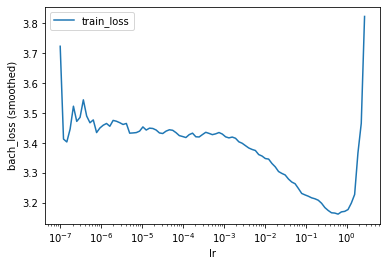

In [415]:
batch_size = 128
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [416]:
lrfinder.get_best_lr()

0.0613590727341321

In [417]:
model.optimizer.set_lr(0.01)

In [418]:
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [419]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 3.1543,	val_loss: 2.4587
1:	[0s / 0s],		train_loss: 2.9230,	val_loss: 2.3822
2:	[0s / 0s],		train_loss: 2.8571,	val_loss: 2.3828
3:	[0s / 0s],		train_loss: 2.7732,	val_loss: 2.3729
4:	[0s / 0s],		train_loss: 2.7885,	val_loss: 2.3833
5:	[0s / 0s],		train_loss: 2.7728,	val_loss: 2.3607
6:	[0s / 0s],		train_loss: 2.7449,	val_loss: 2.3046
7:	[0s / 0s],		train_loss: 2.6826,	val_loss: 2.3089
8:	[0s / 0s],		train_loss: 2.7090,	val_loss: 2.3106
9:	[0s / 0s],		train_loss: 2.6314,	val_loss: 2.3170
10:	[0s / 0s],		train_loss: 2.6239,	val_loss: 2.3222
11:	[0s / 0s],		train_loss: 2.6361,	val_loss: 2.3687
12:	[0s / 0s],		train_loss: 2.6166,	val_loss: 2.3447
13:	[0s / 0s],		train_loss: 2.6350,	val_loss: 2.3768
14:	[0s / 0s],		train_loss: 2.6436,	val_loss: 2.3855
15:	[0s / 0s],		train_loss: 2.6221,	val_loss: 2.3505
16:	[0s / 0s],		train_loss: 2.6475,	val_loss: 2.4177
CPU times: user 2.69 s, sys: 7.3 ms, total: 2.7 s
Wall time: 706 ms


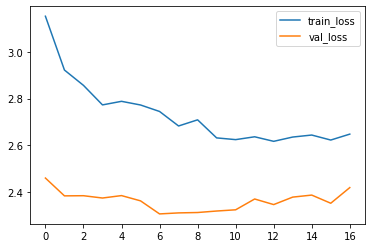

In [420]:
_ = log.plot()

In [421]:
model.partial_log_likelihood(*val).mean()

-3.6548388

In [422]:
_ = model.compute_baseline_hazards()

In [423]:
surv = model.predict_surv_df(x_test)

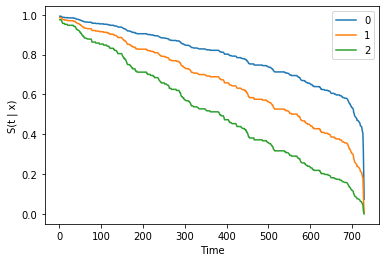

In [431]:
surv.iloc[:, :3].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [426]:
durations_test

array([650,  90, 102,  89, 728, 123,   8,  89, 729, 676, 482, 295,  65,
       331, 589, 586, 211, 431, 560, 150, 727, 532, 157, 588, 231, 307,
       124, 553, 686, 593, 666,   4,  98, 365, 462, 349, 525, 644, 639,
        94, 523, 210,  16, 103, 685, 526, 364, 607, 560, 665,  19, 697,
       667, 683, 258, 727, 588, 727, 362, 366,  33, 237, 412,   4, 683,
       377, 651,   1,  56, 352, 622, 643, 204, 407, 729, 726, 332, 488,
        26, 152, 539, 668,  15, 322,  37, 524,  91, 643, 113, 708, 328,
       149, 275, 694, 412, 521, 383, 168, 725, 251,   1, 546, 651,  29,
       551,   7, 378, 493, 294,  50,  35, 692, 189, 221, 385, 728, 706,
       523, 207, 156, 296,  77, 126, 580, 455, 556, 175, 546,  89, 287,
       439, 708,   6, 657, 725,  59,   2, 679,   2, 497, 399, 559, 370,
        23, 648,   8, 725, 551, 499, 569, 582, 301, 588, 157,  47, 539,
       161,   4, 559, 468, 410, 728, 604,   8, 574, 713, 717, 245, 553,
       724, 168, 553, 114, 553, 306, 433, 433, 672, 218, 588,  3